In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [2]:
# Menetapkan seed untuk reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Parameter-parameter untuk model
max_features = 50000  # Jumlah kata unik yang akan digunakan
maxlen = 500          # Panjang maksimum sequence
embedding_dims = 128  # Dimensi embedding
batch_size = 128      # Ukuran batch untuk training
epochs = 10           # Jumlah epoch maksimum

In [4]:
# Memuat dataset IMDb untuk analisis sentimen (review film positif/negatif)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
# Mengubah sequence menjadi panjang yang sama dengan padding
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [6]:
# Mengonfigurasi early stopping untuk mencegah overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',      # Metrik yang dipantau
    patience=3,              # Jumlah epoch tanpa perbaikan sebelum berhenti
    restore_best_weights=True,  # Mengembalikan bobot terbaik
    verbose=1                # Menampilkan informasi
)

In [7]:
# MODEL 1: SIMPLE RNN

In [8]:
# Membuat model Sequential dengan layer SimpleRNN
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))  # Layer embedding untuk mengubah kata menjadi vektor
model.add(SimpleRNN(32, return_sequences=False))  # Layer SimpleRNN dengan 32 unit
model.add(Dropout(0.5))  # Dropout untuk mencegah overfitting
model.add(Dense(1, activation='sigmoid'))  # Output layer dengan aktivasi sigmoid untuk klasifikasi biner

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
# Mengompilasi model
model.compile(
    loss="binary_crossentropy",  # Fungsi loss untuk klasifikasi biner
    optimizer="rmsprop",         # Optimizer yang digunakan
    metrics=["accuracy"]         # Metrik yang diukur
)

In [10]:
# Menyimpan history metrics untuk plotting
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

In [11]:
print("Training model...")
# Training model SimpleRNN dengan loop manual per epoch
for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")

    # Training satu epoch
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=1,
        verbose=1,
        validation_data=(x_test, y_test),
        callbacks=[early_stopping]
    )

    # Menyimpan metrik per epoch
    train_loss_hist.append(history.history['loss'][0])
    train_acc_hist.append(history.history['accuracy'][0])
    test_loss_hist.append(history.history['val_loss'][0])
    test_acc_hist.append(history.history['val_accuracy'][0])

Training model...

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 30s 114ms/step - accuracy: 0.5987 - loss: 0.6510 - val_accuracy: 0.7977 - val_loss: 0.4497
Restoring model weights from the end of the best epoch: 1.

Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.8188 - loss: 0.4244 - val_accuracy: 0.8154 - val_loss: 0.4477
Restoring model weights from the end of the best epoch: 1.

Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.8674 - loss: 0.3363 - val_accuracy: 0.8374 - val_loss: 0.3861
Restoring model weights from the end of the best epoch: 1.

Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.9010 - loss: 0.2634 - val_accuracy: 0.8435 - val_loss: 0.3931
Restoring model weights from the end of the best epoch: 1.

Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.9383 - loss: 0.1799 - val_accuracy: 0.8321 - val_loss: 0.4342
Restoring model weights from the end of the best epoch: 1.

Epoch 6/10
196/196 ━━━━━━━━━━━

In [12]:
# Membuat prediksi pada data test
y_prob = model.predict(x_test, verbose=0).ravel()
y_pred = (y_prob > 0.5).astype(int)  # Mengkonversi probabilitas ke label
y_true = y_test

In [13]:
# Menghitung metrik evaluasi
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_prob)
fpr, tpr, _ = roc_curve(y_true, y_prob)  # Data untuk kurva ROC

In [14]:
# Menampilkan hasil evaluasi
print(f"\nFinal Evaluation on Test Set:")
print(f"Accuracy : {test_acc_hist[-1]:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")


Final Evaluation on Test Set:
Accuracy : 0.7790
Precision: 0.7769
Recall   : 0.7829
F1 Score : 0.7799
AUC      : 0.8573


In [15]:
# Membuat plot metrik training
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Accuracy vs Epochs')

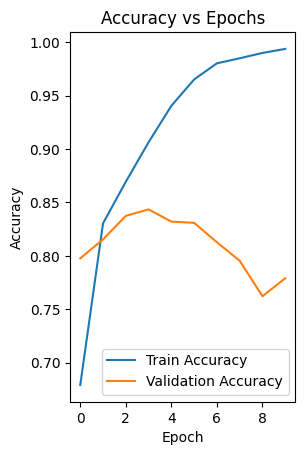

In [16]:
# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(train_acc_hist, label="Train Accuracy")
plt.plot(test_acc_hist, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Epochs")

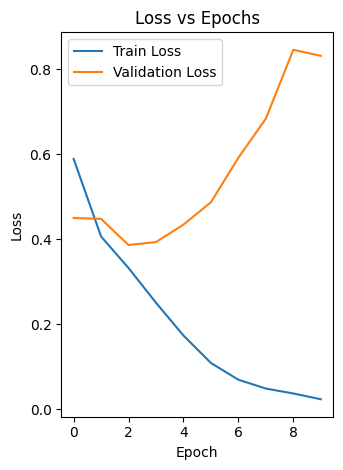

In [17]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss_hist, label="Train Loss")
plt.plot(test_loss_hist, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs Epochs")

plt.tight_layout()
plt.show()

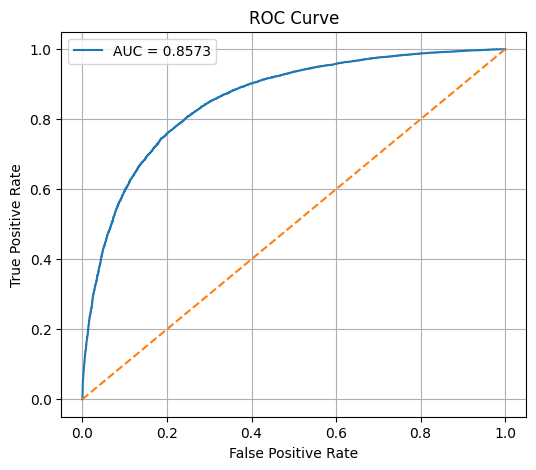

In [18]:
# Plot kurva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')  # Garis baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# MODEL 2: LSTM

In [20]:
# Membuat model Sequential dengan layer LSTM
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(tf.keras.layers.LSTM(32, return_sequences=False))  # Menggunakan LSTM sebagai pengganti SimpleRNN
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [21]:
# Mengompilasi model
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [24]:
print("Training model...")
# Training model LSTM
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Training model...
Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9280 - loss: 0.2018 - val_accuracy: 0.8810 - val_loss: 0.3076
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9346 - loss: 0.1890 - val_accuracy: 0.8764 - val_loss: 0.3182
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.9382 - loss: 0.1756 - val_accuracy: 0.8807 - val_loss: 0.3194
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9499 - loss: 0.1468 - val_accuracy: 0.8762 - val_loss: 0.3946
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


In [25]:
# Evaluasi model LSTM
y_prob = model.predict(x_test, verbose=0).ravel()
y_pred = (y_prob > 0.5).astype(int)
y_true = y_test

In [26]:
# Menghitung metrik evaluasi
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_prob)
fpr, tpr, _ = roc_curve(y_true, y_prob)

In [27]:
# Menampilkan hasil evaluasi
print(f"\nFinal Evaluation on Test Set:")
print(f"Accuracy : {history.history['val_accuracy'][-1]:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")


Final Evaluation on Test Set:
Accuracy : 0.8762
Precision: 0.8558
Recall   : 0.9165
F1 Score : 0.8851
AUC      : 0.9503


In [28]:
# Membuat plot metrik training
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Accuracy vs Epochs')

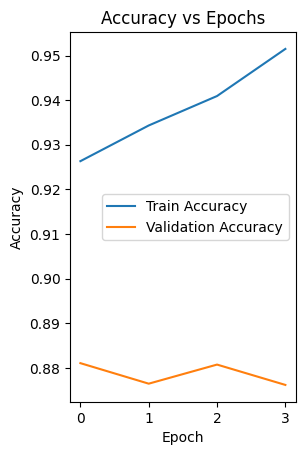

In [29]:
# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Epochs")

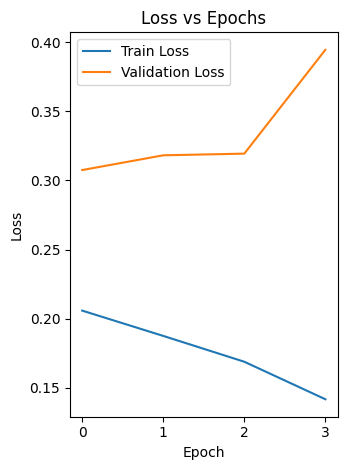

In [30]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs Epochs")

plt.tight_layout()
plt.show()

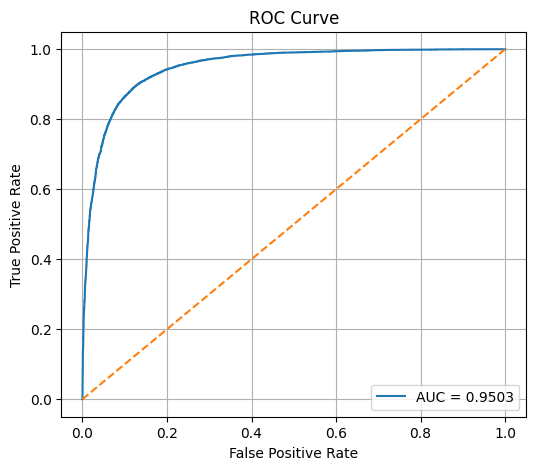

In [31]:
# Plot kurva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# MODEL 3: GRU

In [33]:
# Membuat model Sequential dengan layer GRU
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(tf.keras.layers.GRU(32, return_sequences=False))  # Menggunakan GRU sebagai pengganti SimpleRNN
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
# Mengompilasi model
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [35]:
print("Training model...")
# Training model GRU
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Training model...
Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.6011 - loss: 0.6505 - val_accuracy: 0.7924 - val_loss: 0.4578
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.8142 - loss: 0.4278 - val_accuracy: 0.8392 - val_loss: 0.3863
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8668 - loss: 0.3269 - val_accuracy: 0.8624 - val_loss: 0.3317
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.8793 - loss: 0.3032 - val_accuracy: 0.8628 - val_loss: 0.3427
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9024 - loss: 0.2545 - val_accuracy: 0.8777 - val_loss: 0.3170
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9157 - loss: 0.2222 - val_accuracy: 0.8810 - val_loss: 0.3031
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9349 - loss: 0.1810 - val_accuracy: 0.8774 - val_loss: 0.3531
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9421 - los

In [36]:
# Evaluasi model GRU
y_prob = model.predict(x_test, verbose=0).ravel()
y_pred = (y_prob > 0.5).astype(int)
y_true = y_test

In [37]:
# Menghitung metrik evaluasi
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_prob)
fpr, tpr, _ = roc_curve(y_true, y_prob)

In [38]:
# Menampilkan hasil evaluasi
print(f"\nFinal Evaluation on Test Set:")
print(f"Accuracy : {history.history['val_accuracy'][-1]:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc:.4f}")


Final Evaluation on Test Set:
Accuracy : 0.8778
Precision: 0.8660
Recall   : 0.9015
F1 Score : 0.8834
AUC      : 0.9492


In [39]:
# Membuat plot metrik training
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Accuracy vs Epochs')

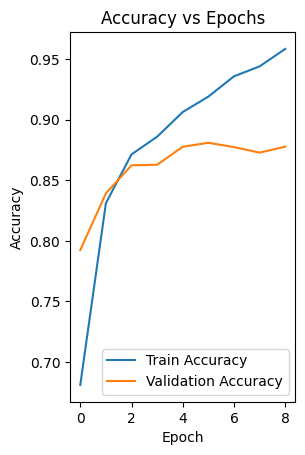

In [40]:
# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Epochs")

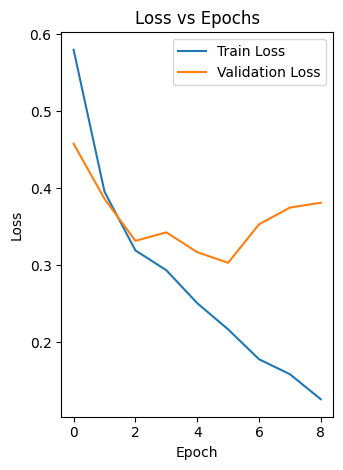

In [41]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs Epochs")

plt.tight_layout()
plt.show()

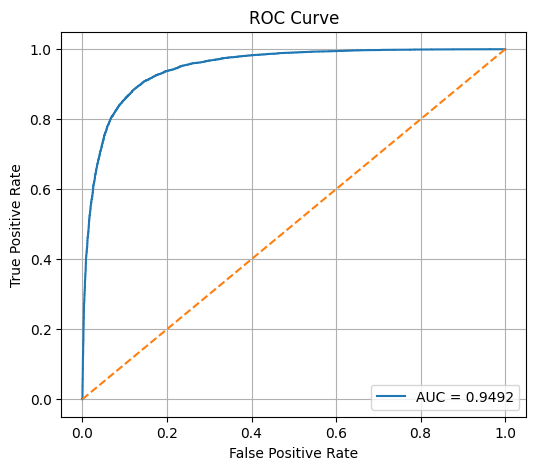

In [42]:
# Plot kurva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()